In [1]:
#可能要用到的库
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For warnings
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler
# Importing necessary packages for building and tuning our model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.under_sampling import NearMiss               # For Undersampling
from imblearn.over_sampling import RandomOverSampler       # For Oversampling
from imblearn.combine import SMOTETomek                    # For Both Undersampling & Oversampling
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras_tuner.tuners import RandomSearch
# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

D:\miniconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd
dfread = pd.read_csv('./data-4+18.csv')

In [50]:
dfread

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,collections_12_mths_ex_med
0,5000.0,36.0,0.1065,162.87,1.0,6.0,10.0,RENT,24000.0,Verified,...,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,171.62,Paid,0.0
1,2400.0,36.0,0.1596,84.33,2.0,14.0,10.0,RENT,12252.0,Not Verified,...,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,649.91,Paid,0.0
2,10000.0,36.0,0.1349,339.31,2.0,10.0,10.0,RENT,49200.0,Source Verified,...,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,357.48,Paid,0.0
3,3000.0,60.0,0.1269,67.79,1.0,9.0,1.0,RENT,80000.0,Source Verified,...,0.0,0.0,15.0,0.0,27783.0,0.539,38.0,67.30,Paid,0.0
4,5000.0,36.0,0.0790,156.46,0.0,3.0,3.0,RENT,36000.0,Source Verified,...,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,161.03,Paid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425416,12000.0,60.0,0.2869,378.65,5.0,25.0,10.0,MORTGAGE,64500.0,Not Verified,...,0.0,3.0,22.0,1.0,16478.0,0.513,42.0,10820.77,Paid,0.0
2425417,10000.0,36.0,0.0799,313.32,0.0,4.0,10.0,MORTGAGE,65000.0,Source Verified,...,1.0,0.0,15.0,0.0,9751.0,0.157,27.0,2151.99,Paid,0.0
2425418,10050.0,36.0,0.1699,358.26,3.0,15.0,8.0,RENT,37000.0,Not Verified,...,0.0,1.0,15.0,0.0,14300.0,0.470,21.0,358.26,Default,0.0
2425419,6000.0,36.0,0.1144,197.69,1.0,8.0,5.0,RENT,41000.0,Source Verified,...,1.0,0.0,9.0,0.0,1356.0,0.101,18.0,2958.01,Paid,0.0


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 假设df是你的DataFrame，loan_status是类别列，其余的都是特征列

# 初始化归一化器
scaler = MinMaxScaler()
features1 = ['loan_status', 'installment', 'loan_amnt', 'int_rate', 'grade', 'sub_grade', 'term', 'annual_inc', 'dti', 'emp_length', 'collections_12_mths_ex_med', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util']
dfread1=dfread[features1]
# 选取你想要对比的特征列
features = ['installment', 'loan_amnt', 'int_rate', 'grade', 'sub_grade', 'term', 'annual_inc', 'dti', 'emp_length', 'collections_12_mths_ex_med', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util']

# 对这些特征进行归一化
normalized_features = pd.DataFrame(scaler.fit_transform(dfread1[features]), columns=features, index=dfread1.index )


In [64]:
df_combined_plottezhe = pd.concat([normalized_features, dfread1['loan_status']], axis=1)

In [65]:
df_combined_plottezhe

,installment,loan_amnt,int_rate,grade,sub_grade,term,annual_inc,dti,emp_length,collections_12_mths_ex_med,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,loan_status
0,0.092099,0.113924,0.207944,0.166667,0.176471,0.0,0.000218,0.027668,1.000000,0.0,0.000000,0.035088,0.000000,0.004698,0.093803,Paid
1,0.046300,0.048101,0.414720,0.333333,0.411765,0.0,0.000111,0.008719,1.000000,0.0,0.000000,0.017544,0.000000,0.001018,0.110389,Paid
2,0.194985,0.240506,0.318536,0.333333,0.294118,0.0,0.000447,0.020010,1.000000,0.0,0.000000,0.157895,0.000000,0.001927,0.023535,Paid
3,0.036655,0.063291,0.287383,0.166667,0.264706,1.0,0.000727,0.017948,0.000000,0.0,0.000000,0.245614,0.000000,0.009564,0.060406,Paid
4,0.088361,0.113924,0.100857,0.000000,0.088235,0.0,0.000327,0.011201,0.222222,0.0,0.000000,0.140351,0.000000,0.002741,0.031716,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425416,0.217925,0.291139,0.910436,0.833333,0.735294,1.0,0.000586,0.009660,1.000000,0.0,0.000000,0.368421,0.011628,0.005673,0.057492,Paid
2425417,0.179830,0.240506,0.104361,0.000000,0.117647,0.0,0.000591,0.019560,1.000000,0.0,0.025641,0.245614,0.000000,0.003357,0.017595,Paid
2425418,0.206035,0.241772,0.454829,0.500000,0.441176,0.0,0.000336,0.020571,0.777778,0.0,0.000000,0.245614,0.000000,0.004923,0.052673,Default
2425419,0.112403,0.139241,0.238707,0.166667,0.235294,0.0,0.000373,0.020000,0.444444,0.0,0.025641,0.140351,0.000000,0.000467,0.011319,Paid


In [66]:

# 计算每个类别的平均值
grouped_normalized = df_combined_plottezhe.groupby('loan_status').mean()

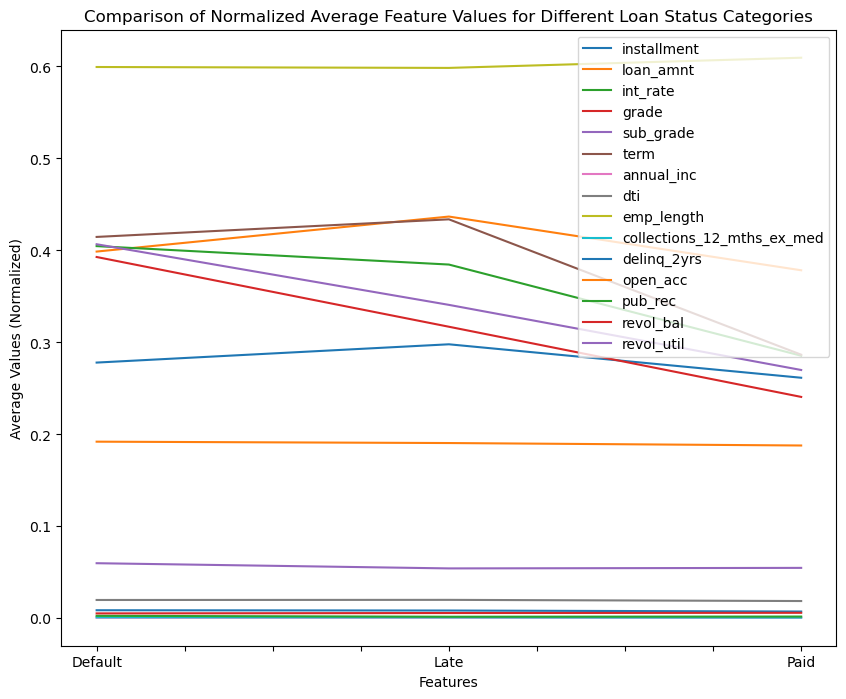

In [67]:
# 绘制折线图
grouped_normalized.plot(kind='line', figsize=(10, 8))

# 设置图表标题和坐标轴标签
plt.title('Comparison of Normalized Average Feature Values for Different Loan Status Categories')
plt.xlabel('Features')
plt.ylabel('Average Values (Normalized)')

# 显示图表
plt.show()

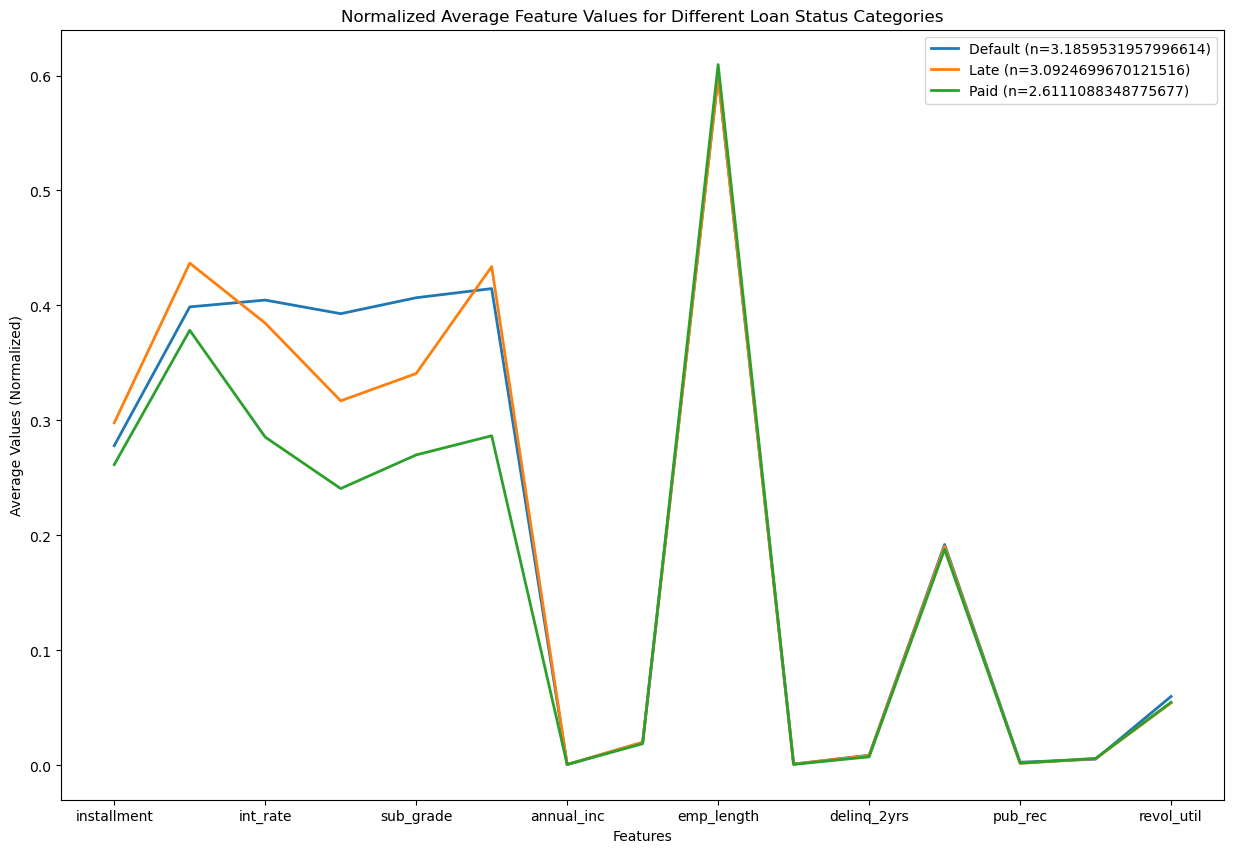

In [68]:
# 绘制每个类别在一个图上的折线图
fig, ax = plt.subplots(figsize=(15,10)) # 设置图的大小

# 为每个类别绘制一条折线
for i, (status, status_data) in enumerate(grouped_normalized.iterrows(), 1):
     status_data.plot(ax=ax, linewidth=2, label=f'{status} (n={status_data.sum()})')
     plt.title('Normalized Average Feature Values for Different Loan Status Categories')

# 设置图表标题和坐标轴标签
plt.xlabel('Features')
plt.ylabel('Average Values (Normalized)')

# 显示图例
plt.legend()

# 显示图表
plt.show()

In [3]:
X = dfread.drop("loan_status",axis=1)
# 选择 'loan_status' 列
y = dfread['loan_status']
import warnings
warnings.filterwarnings(action='ignore')
categorical= [ 'home_ownership', 'verification_status', 'purpose',  'loan_status']
numerical=['installment','loan_amnt','int_rate','grade','sub_grade','term','annual_inc','dti','emp_length','collections_12_mths_ex_med','delinq_2yrs','open_acc','pub_rec','revol_bal','revol_util',]
# 使用 astype 方法将每列转换为 double 类型
for column in numerical:
    dfread[column] = dfread[column].astype('float64')

high_vif_columns = ['installment','loan_amnt','int_rate','grade','sub_grade','term']

In [4]:
df_vif6 = dfread[high_vif_columns]
from sklearn.preprocessing import MinMaxScaler
# 创建 MinMaxScaler 实例
scaler = MinMaxScaler()
# 计算归一化参数并转换数据
df_scaled = pd.DataFrame(scaler.fit_transform(df_vif6), columns=df_vif6.columns )

Number of components to keep to explain 95% of variance: 3


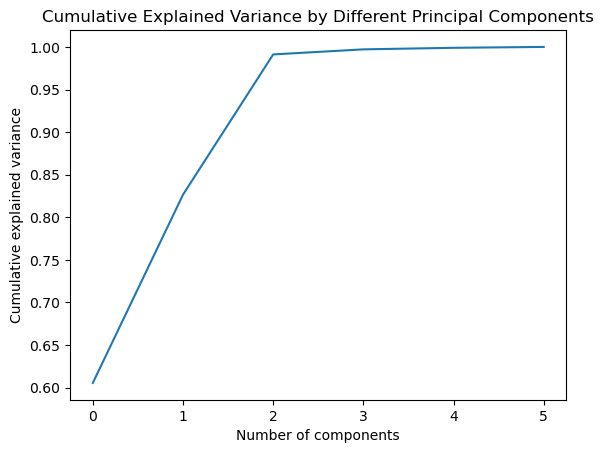

In [5]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
# 创建 PCA 实例
pca = PCA()
# 对数据进行 PCA 变换
df_6pca = pca.fit_transform(df_scaled)
# 查看累积解释方差的比例
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
# 选择主成分的个数，使得累积解释方差达到 95%
n_components = (cumulative_explained_variance >= 0.95).argmax() + 1
# 打印选择的主成分个数
print(f"Number of components to keep to explain 95% of variance: {n_components}")
# 可视化累积解释方差
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
#plt.axhline(0.8, color='red', linestyle='--')
plt.title('Cumulative Explained Variance by Different Principal Components')
plt.show()
# 应用 PCA 并选择主成分
pca = PCA(n_components=n_components)
df_6pca = pca.fit_transform(df_scaled)
# 查看转换后的数据
#print(df_6pca)

In [6]:
df_pca_df = pd.DataFrame(df_6pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca_df

,PC1,PC2,PC3
0,-0.411452,0.053206,-0.224839
1,-0.302615,0.391650,-0.191457
2,-0.289454,0.190877,-0.011405
3,0.503951,-0.084976,-0.614358
4,-0.489298,-0.132313,-0.290334
...,...,...,...
2425416,0.945611,0.697486,-0.049861
2425417,-0.445785,-0.178843,-0.146657
2425418,-0.192776,0.417440,0.073547
2425419,-0.385668,0.083916,-0.181265


In [7]:
# One hot encoding
df_category=pd.get_dummies(data=dfread,columns=['home_ownership','verification_status','purpose'],drop_first=True)
# 删除原有的特征列
df_combined = df_category.drop(columns = high_vif_columns)
# 将主成分得分 DataFrame 拼接到原始 DataFrame
df_combined = pd.concat([df_combined, df_pca_df], axis=1)

In [8]:
X=df_combined.drop('loan_status',axis=1)
y=df_combined['loan_status']
y = pd.factorize(y)[0]
print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

[0 0 0 ... 1 0 1]


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# 加载已经保存的抽样文件
X_train_os = np.load("./X_train_os.npy")
y_train_os = np.load("./y_train_os.npy")


In [11]:
y_train_os = np.load("./y_train_os.npy")

In [12]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
from keras.utils import to_categorical
# 将整数标签转换为one-hot编码
y_train_os = to_categorical(y_train_os)
y_test = to_categorical(y_test)

# 输出转换后的one-hot编码标签
print(y_train_os.shape)
print(y_test.shape)

(4734009, 3)
(606356, 3)


In [14]:
# Define the build_model function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 4, 20)):#可变数量的Dense层(2到20之间)和一个可变数量的unit(32到512之间)
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))
    model.add(layers.Dense(3, activation='Softmax'))#三分类 三个输出节点
    model.compile(
    optimizer=keras.optimizer.adam.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
    loss='categorical_crossentropy',
    metrics=['accuracy']  #评估模型性能的指标
)
    print(type(model))
    return model

#from keras_tuner.tuners import RandomSearch
from keras_tuner import RandomSearch
from keras.optimizers import Adam
from tensorflow import keras
tuner = RandomSearch(                   # 调谐器使用前面定义的build_model函数作为其模型构建函数
    build_model,                        # 根据给定的超参数构建模型  并根据验证精度搜索最佳超参数
    objective='val_accuracy', #调谐器要优化的目标，这里设置为 'val_accuracy'，调谐器将基于验证集的准确率来评估和选择最佳超参数。
    max_trials=3,  #调谐器将执行的最大试验次数，即它会尝试不同的超参数组合的最大次数
    executions_per_trial=2,)  #每次试验中模型构建和评估的次数
tuner.search(X_train_os, y_train_os, epochs=10, validation_data=(X_test, y_test))  # 执行超参数搜索

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]                # 将一个最佳超参数存储在best_hps变量中

Reloading Tuner from .\untitled_project\tuner0.json


In [15]:
#定义create_model函数来构建具有最佳超参数的Keras模型
#from keras.wrappers.scikit_learn import KerasClassifier
def create_model(num_layers, num_nodes, activation):
    model = keras.Sequential()
    for i in range(num_layers):
        if i==0:      #对于第一层（输入层），需要指定 input_dim 参数，它应该与特征维度匹配。
            model.add(layers.Dense(num_nodes[i], input_dim=X_train.shape[1]))
            model.add(layers.Activation(activation))
            model.add(layers.Dropout(0.3))
        else:   #对于其他层，只需要指定每层的神经元数量。每层都使用了相同的激活函数和 Dropout 正则化来减少过拟合。
            model.add(layers.Dense(num_nodes[i]))
            model.add(layers.Activation(activation))
            model.add(layers.Dropout(0.3))       
    model.add(layers.Dense(units=3, kernel_initializer='glorot_uniform', activation='Softmax'))  #输出层
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  #编译
    return model

# 从之前找到的最佳超参数 best_hps 中提取每层的神经元数量，并构建了一个列表 num_nodes。这个列表随后可以用于 create_model 函数来构建模型。
num_nodes = [best_hps.get('units_' + str(i)) for i in range(best_hps.get('num_layers'))]

In [16]:
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(
    build_fn=create_model,
    num_layers=best_hps.get('num_layers'),  #设置模型的层数  build_model
    num_nodes=num_nodes, #设置每一层的神经元数量  create_model
    activation='Softmax'
)

In [17]:
from tensorflow.keras import layers
# from keras.callbacks import ModelCheckpoint
# model_checkpoint = ModelCheckpoint("best_bp_model.h5", monitor="val_accuracy", verbose=1, save_best_only=True)
# 用最优超参数拟合Keras分类器模型
mymodel= model.fit(X_train_os, y_train_os, epochs=1, validation_data=(X_test, y_test))





147938/147938 [==============================] - 516s 3ms/step - loss: 0.9518 - accuracy: 0.4970 - val_loss: 0.7000 - val_accuracy: 0.6307


In [ ]:
# 保存模型
mymodel.save('my_model.h5')

In [ ]:
# 加载模型
new_model = load_model('my_model.h5')

In [ ]:
import shap

In [23]:
X_train_os

array([[1.00000000e+00, 6.36236445e-04, 1.85287140e-02, ...,
        1.17559855e-01, 3.51992558e-01, 3.91761869e-01],
       [1.00000000e+00, 4.72600060e-04, 1.90692600e-02, ...,
        7.79380114e-01, 5.89150045e-01, 3.30062121e-01],
       [8.88888889e-01, 1.99987298e-03, 1.37338712e-02, ...,
        1.62301003e-01, 1.68016351e-01, 6.29826240e-01],
       ...,
       [1.00000000e+00, 1.63623657e-03, 2.16018178e-02, ...,
        2.51776017e-01, 4.02894775e-01, 6.57903057e-01],
       [3.33333333e-01, 1.36350926e-03, 1.74276019e-02, ...,
        1.61871751e-01, 3.68141273e-01, 4.80100658e-01],
       [1.00000000e+00, 6.03509168e-04, 1.14615762e-02, ...,
        7.07560854e-01, 3.53162420e-01, 3.42388682e-01]])

In [40]:
model

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x00000233926C9120>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	num_layers=3
	num_nodes=[288, 320, 64]
	activation=Softmax
	class_weight=None
)

18949/18949 [==============================] - 27s 1ms/step


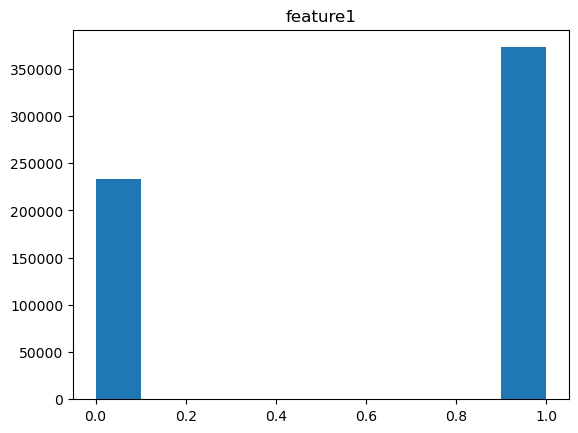

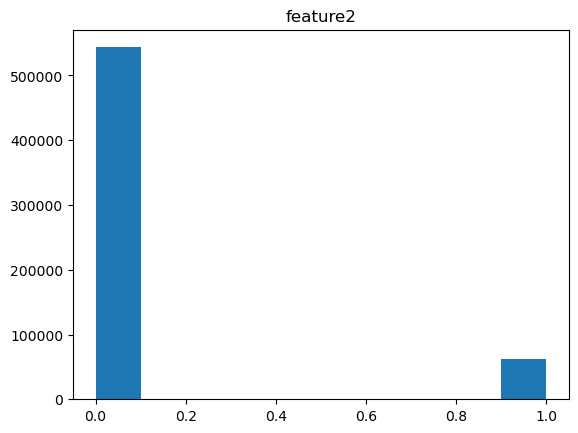

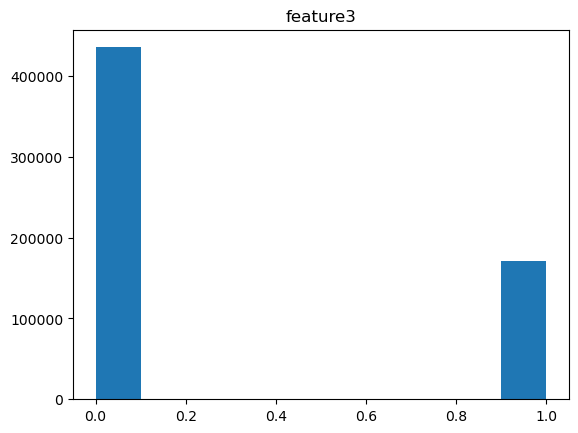

IndexError: index 3 is out of bounds for axis 1 with size 3

In [49]:
# 使用模型来预测特征重要性



In [ ]:
import shap
import numpy as np
from scikeras.wrappers import KerasClassifier

# 假设model是你的KerasClassifier模型，X_train和y_train是你的训练数据和标签
# 假设X_test是你的测试数据

# 创建一个SHAP Explainer对象
explainer = shap.KernelExplainer(model.predict_proba, X_train_os)

# 计算每个样本的SHAP值
shap_values = explainer.shap_values(X_test)



In [ ]:
# 对于每个类别，计算并可视化特征重要性
if len(shap_values.shape ) == 2:  # 如果shap_values是一维数组
    shap.summary_plot(shap_values, X_test)
elif len(shap_values.shape ) == 3:  # 如果shap_values是二维数组（每个样本一个类别）
    for i, shap_values_i in enumerate(shap_values):
        shap.summary_plot(shap_values_i, X_test, feature_names=['Feature 1', 'Feature 2', 'Feature 3', ...], class_names=['Class 1', 'Class 2', 'Class 3'])
        plt.show()

In [ ]:
# 打印每个类别的特征重要性
for category, importance in enumerate(feature_importances):
    print(f"Class {category}:")
     for i, imp in enumerate(importance):
         print(f"Feature {i}: {imp}")

In [ ]:

# 创建一个SHAP Explainer对象
# 使用sample_data作为背景数据
explainer = shap.KernelExplainer(model.predict_proba, sample_data)

# 计算每个样本的SHAP值
# 注意：在这种情况下，我们只能计算测试数据相对于抽样背景数据的SHAP值
shap_values = explainer.shap_values(sample_X_test, silent=True)   # silent=True参数可以减少一些输出